### ML Project: Texas House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
# graph style
sns.set_theme()

### Business Requirement

For this project, the number of houses will be considered to analyse its characteristics to find the best house prices. We will use the house dataset from the state of Texas. The state of Texas counts 5894 houses that are located. For each row of the dataset represents the house that are for sale although the column of the datasets are considered as features that describe the current condition of the house. 

### Problem Statement

The goal of this project is to find the best model that predicts the best house prices in texas based the input data to improve decision-making on the house prices. 

In [2]:
housing_data = pd.read_csv("American_Housing_Data_20231209.csv")
housing_data.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [3]:
# identify dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [4]:
# summary statistics
housing_data.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


## Texas Housing Dataset: Data analysis

In [5]:
# retrieve all houses for the state of texas
texas_housing = housing_data[housing_data["State"] == "Texas"]
texas_housing.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
20126,75051,394900.0,3,2,1529,1954 BEACH DR,Grand Prairie,Texas,39783,1216.6,Dallas,63560.0,32.72635,-96.99375
20127,75051,414900.0,5,4,2376,1947 PEZ DR,Grand Prairie,Texas,39783,1216.6,Dallas,63560.0,32.72635,-96.99375
20128,75201,2995000.0,3,4,3415,3130 N HARWOOD ST APT 1406,Dallas,Texas,17491,4907.2,Dallas,149296.0,32.78826,-96.79953
20129,75201,650000.0,2,2,1507,511 N AKARD ST APT 1503,Dallas,Texas,17491,4907.2,Dallas,149296.0,32.78826,-96.79953
20130,75201,469000.0,2,3,2045,1505 ELM ST APT 1203,Dallas,Texas,17491,4907.2,Dallas,149296.0,32.78826,-96.79953


In [6]:
# identify texas dataset
def identify_texas_data(texas_data):
  texas_data_size = texas_data.size
  texas_data_shape = texas_data.shape
  return (texas_data_size, texas_data_shape)

In [7]:
texas_data_id = identify_texas_data(texas_housing)
print(f"Texas dataset - size: {texas_data_id[0]}")
print(f"Texas dataset - shape: {texas_data_id[1]}")
print(f"\t - number of houses: {texas_data_id[1][0]} houses")
print(f"\t - number of house features: {texas_data_id[1][1]} features")

Texas dataset - size: 82516
Texas dataset - shape: (5894, 14)
	 - number of houses: 5894 houses
	 - number of house features: 14 features


In [8]:
# identify datatypes for each feature
texas_housing.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

### Data Preprocessing

In [9]:
# identify duplicated samples
num_duplicated_samples = texas_housing.duplicated().sum() # 88 duplicated sample
print(f"Number of duplicated rows after removing: {num_duplicated_samples}")
print(f"Number of Samples before removing: {texas_housing.shape}")

Number of duplicated rows after removing: 88
Number of Samples before removing: (5894, 14)


In [10]:
texas_housing = texas_housing.drop_duplicates()
num_duplicated_samples = texas_housing.duplicated().sum()
print(f"Number of duplicated rows after removing: {num_duplicated_samples}")
print(f"Number of Samples before removing: {texas_housing.shape}")

Number of duplicated rows after removing: 0
Number of Samples before removing: (5806, 14)


In [11]:
# identify nullvalues
texas_housing.isnull().sum() # no null values

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [17]:
# modify price data from place to new place
price_data = texas_housing["Price"]
texas_housing = texas_housing.drop(columns=["Price"])
texas_housing = pd.concat([texas_housing, price_data], axis=1)
texas_housing.head()

,Zip Code,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude,Price
20126,75051,3,2,1529,1954 BEACH DR,Grand Prairie,Texas,39783,1216.6,Dallas,63560.0,32.72635,-96.99375,394900.0
20127,75051,5,4,2376,1947 PEZ DR,Grand Prairie,Texas,39783,1216.6,Dallas,63560.0,32.72635,-96.99375,414900.0
20128,75201,3,4,3415,3130 N HARWOOD ST APT 1406,Dallas,Texas,17491,4907.2,Dallas,149296.0,32.78826,-96.79953,2995000.0
20129,75201,2,2,1507,511 N AKARD ST APT 1503,Dallas,Texas,17491,4907.2,Dallas,149296.0,32.78826,-96.79953,650000.0
20130,75201,2,3,2045,1505 ELM ST APT 1203,Dallas,Texas,17491,4907.2,Dallas,149296.0,32.78826,-96.79953,469000.0


### Exploratory Data Analysis

Objective of Exploratory Data analysis
+ create a numeric and categorical distribution
+ finding for possible outliers per feature

In [18]:
# numeric distribution
texas_feature_list = texas_housing.columns
def create_num_dataset(texas_data, feature_list):
  # create list that stores all numeric feature from the actual feature list
  num_feature_list = []
  # iterate the feature and check whether its data type is considered as integer or float
  for feature in feature_list:
    feature_int = pd.api.types.is_integer_dtype(texas_data[feature])
    feature_float = pd.api.types.is_float_dtype(texas_data[feature])
    if feature_int or feature_float:
      num_feature_list.append(feature)

  # plot num_distribution
  texas_data2 = texas_data[num_feature_list]
  return texas_data2

In [34]:
tex_num_data = create_num_dataset(texas_housing, texas_feature_list)
tex_num_data.index = list(range(0,texas_housing.shape[0]))
tex_num_data

,Zip Code,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude,Price
0,75051,3,2,1529,39783,1216.6,63560.0,32.72635,-96.99375,394900.0
1,75051,5,4,2376,39783,1216.6,63560.0,32.72635,-96.99375,414900.0
2,75201,3,4,3415,17491,4907.2,149296.0,32.78826,-96.79953,2995000.0
3,75201,2,2,1507,17491,4907.2,149296.0,32.78826,-96.79953,650000.0
4,75201,2,3,2045,17491,4907.2,149296.0,32.78826,-96.79953,469000.0
...,...,...,...,...,...,...,...,...,...,...
5801,79938,4,3,1664,91575,90.6,86064.0,31.85764,-106.03895,274500.0
5802,79938,3,2,1579,91575,90.6,86064.0,31.85764,-106.03895,252835.0
5803,79938,4,3,1825,91575,90.6,86064.0,31.85764,-106.03895,350950.0
5804,79938,4,3,2811,91575,90.6,86064.0,31.85764,-106.03895,279950.0


In [35]:
beds_max = tex_num_data["Beds"].max()
beds_min = tex_num_data["Beds"].min()
print(f"Number of beds: ")
print(f"\t - minimal amount: {beds_min}")
print(f"\t - maximal amount: {beds_max}")

Number of beds: 
	 - minimal amount: 1
	 - maximal amount: 34


4


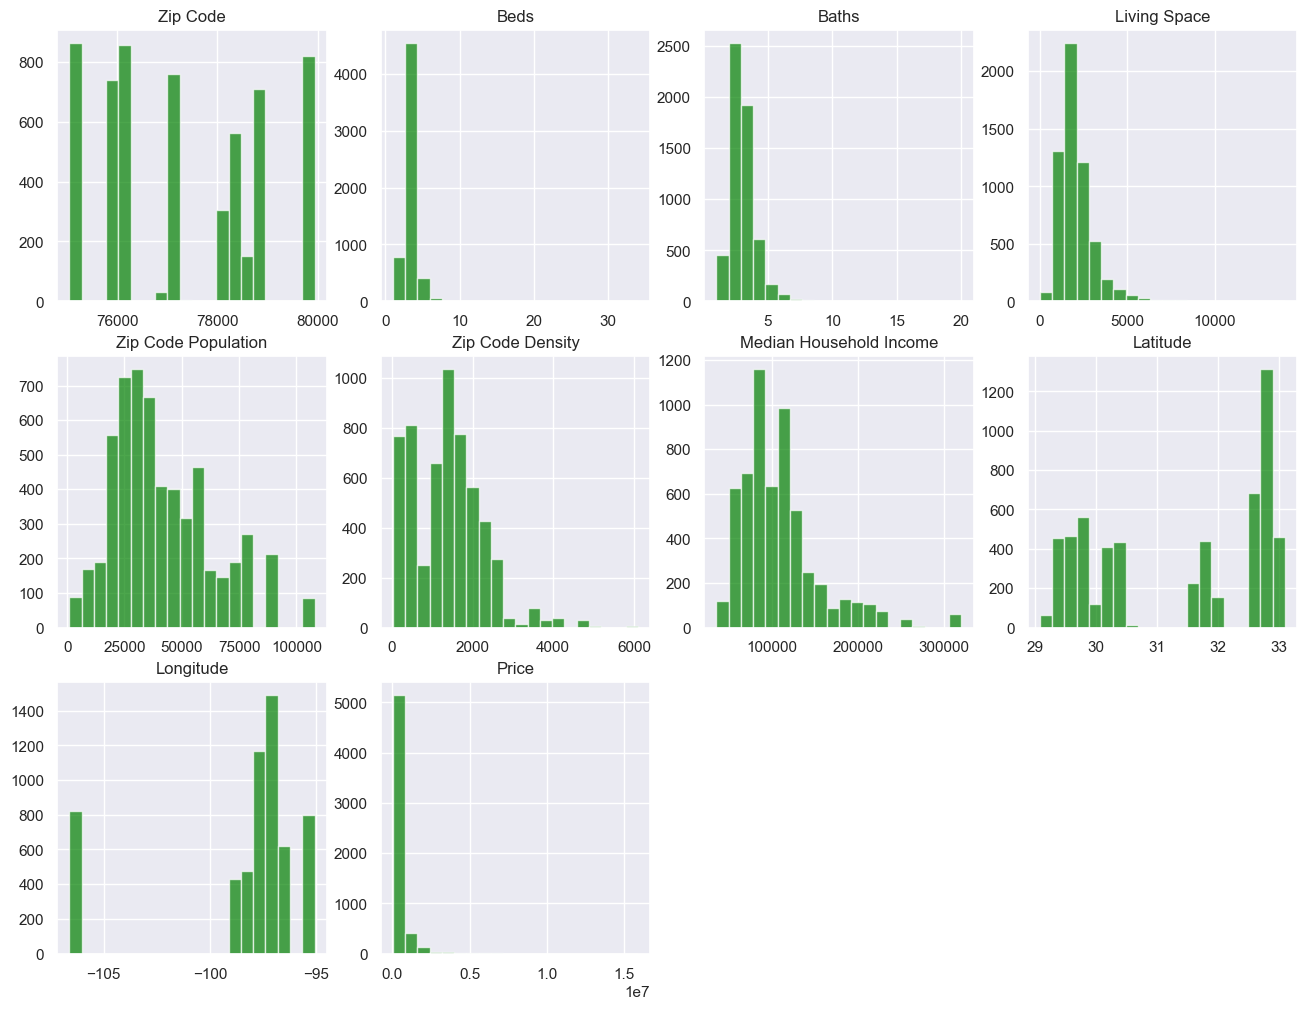

In [109]:
# visualise numeric distribution plot
num_features = tex_num_data.shape[1]
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols
print(num_cols)

# create subplot
fig, dist = plt.subplots(num_rows, num_cols, figsize=(16,12))
# Flatten axes array for easy iteration if necessary
distplots = dist.flatten()
# Iterate over the features and plot the histogram
for i, col in enumerate(tex_num_data.columns):
  distplots[i].hist(tex_num_data[col], bins=20, alpha=0.7, color="green")
  distplots[i].set_title(col)
  
  # sns.histplot(data=tex_num_data, x="Beds", binwidth=3, dist[i,j])

# If there are more subplots than features, hide the empty subplots
for j in range(i + 1, len(distplots)):
    fig.delaxes(distplots[j])

In [62]:
# categorical distribution
txs_county_data = texas_housing["County"].value_counts().to_frame(name="Number of Houses")
txs_county_data = txs_county_data.reset_index().rename(columns={"index": "County"})
txs_county_data

,County,Number of Houses
0,Tarrant,1564
1,Bexar,865
2,Dallas,835
3,El Paso,820
4,Travis,810
5,Harris,789
6,Williamson,33
7,Collin,29
8,Hays,17
9,Denton,14


In [101]:
num_pop = texas_housing["Zip Code Population"]
county_pop_data = texas_housing.groupby("County")[["Zip Code Population"]].sum().reset_index()
county_pop_data = txs_county_data.merge(county_pop_data, on="County")
county_pop_data.head()

,County,Number of Houses,Zip Code Population
0,Tarrant,1564,60504613
1,Bexar,865,39067954
2,Dallas,835,30538583
3,El Paso,820,51604894
4,Travis,810,27006692


In [108]:
# visualise categorical variable using plotly
px.bar(data_frame=county_pop_data, x="County", y="Number of Houses", 
       title="Number of Houses per County", 
       color_discrete_sequence=["Green"]*14, opacity=0.75,
       hover_data=["Number of Houses"],
       labels="Houses")


### Correlation Analysis

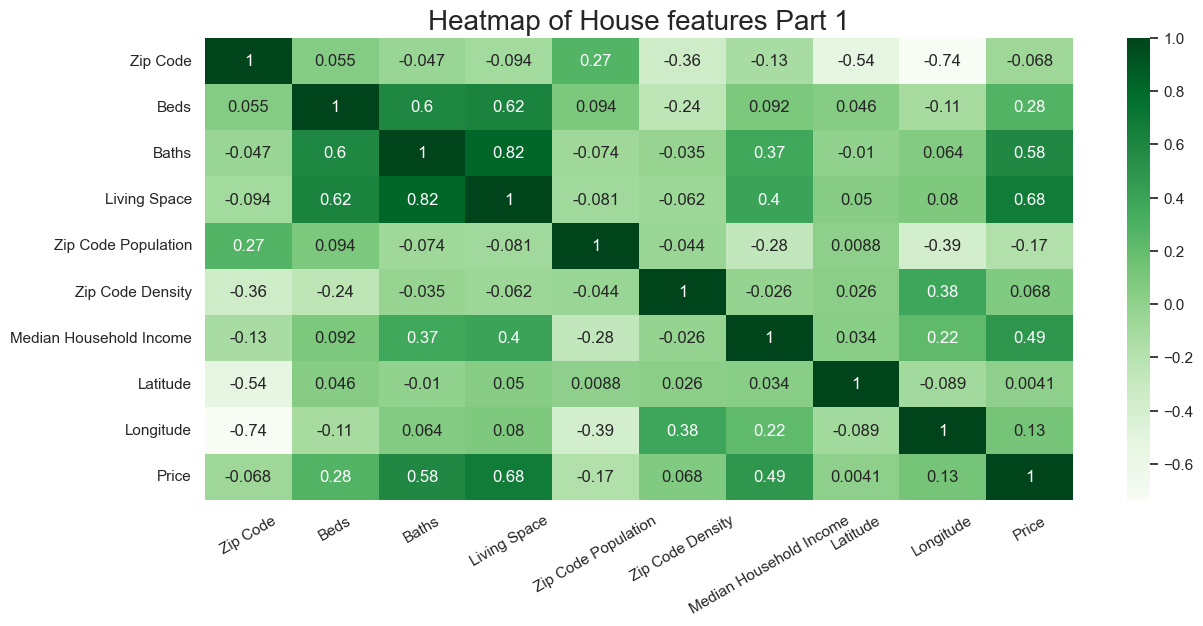

In [154]:
# create correlation table
texas_corr_data = tex_num_data.corr()

# visualise using heatmap
plt.figure(figsize=(14,6))
sns.heatmap(data=texas_corr_data, annot=True, cmap="Greens")
plt.title("Heatmap of House features Part 1", fontsize=20)
plt.xticks(rotation=30)
plt.show()

According to the heatmap, the best features for this problem that help to predict the best house prices are: 
+ Beds: r= 0.28
+ Baths: r=0.58
+ Living Space: r=0.68
+ Median Household Income: r=0.49
+ Longitude: r=0.13

### Feature Engineering

In this stage, we will be selecting the numeric features that the describe the best of our house prices. 

- feature scaling
- feature engineering
- feature selection for modeling

In [140]:
feature_data = tex_num_data[:]
feature_data.head()

,Zip Code,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude,Price
0,75051,3,2,1529,39783,1216.6,63560.0,32.72635,-96.99375,394900.0
1,75051,5,4,2376,39783,1216.6,63560.0,32.72635,-96.99375,414900.0
2,75201,3,4,3415,17491,4907.2,149296.0,32.78826,-96.79953,2995000.0
3,75201,2,2,1507,17491,4907.2,149296.0,32.78826,-96.79953,650000.0
4,75201,2,3,2045,17491,4907.2,149296.0,32.78826,-96.79953,469000.0


In [142]:
# feature engineering
# Price                                 reduce 10**3 to 1k 
# Household income                      reduce to 1k          900 203 --> 900.02k dollar
# Living Space                          convert to m2
# Zip code population                   reduce to 1k
feature_data.loc[:, ["Price(1k)"]] = feature_data["Price"]/1000
feature_data.loc[:, ["Median Household Income(1k)"]] = feature_data["Median Household Income"]/1000
living_space_sqf = 0.092903 # in sqm: in squared metres
feature_data.loc[:, ["Living Space(sqm)"]] = feature_data["Living Space"]*living_space_sqf

# drop unnecessary columns
feature_data = feature_data.drop(columns=["Price"], axis=1)
feature_data = feature_data.drop(columns=["Median Household Income"], axis=1)
feature_data = feature_data.drop(columns=["Living Space"], axis=1)
feature_data.head()

,Zip Code,Beds,Baths,Zip Code Population,Zip Code Density,Latitude,Longitude,Price(1k),Median Household Income(1k),Living Space(sqm)
0,75051,3,2,39783,1216.6,32.72635,-96.99375,394.9,63.560,142.048687
1,75051,5,4,39783,1216.6,32.72635,-96.99375,414.9,63.560,220.737528
2,75201,3,4,17491,4907.2,32.78826,-96.79953,2995.0,149.296,317.263745
3,75201,2,2,17491,4907.2,32.78826,-96.79953,650.0,149.296,140.004821
4,75201,2,3,17491,4907.2,32.78826,-96.79953,469.0,149.296,189.986635


In [143]:
# # price/bedrooms
# # price/bathrooms
# # price/living space
feature_data["Price_p_bed(1k/bed)"] = feature_data["Price(1k)"]/feature_data["Beds"]
feature_data["Price_p_bath(1k/bath)"] = feature_data["Price(1k)"]/feature_data["Baths"]
feature_data["Price_p_living"] = feature_data["Price(1k)"]/feature_data["Living Space(sqm)"]

# show feature data
feature_data.head()

,Zip Code,Beds,Baths,Zip Code Population,Zip Code Density,Latitude,Longitude,Price(1k),Median Household Income(1k),Living Space(sqm),Price_p_bed(1k/bed),Price_p_bath(1k/bath),Price_p_living
0,75051,3,2,39783,1216.6,32.72635,-96.99375,394.9,63.560,142.048687,131.633333,197.450000,2.780033
1,75051,5,4,39783,1216.6,32.72635,-96.99375,414.9,63.560,220.737528,82.980000,103.725000,1.879608
2,75201,3,4,17491,4907.2,32.78826,-96.79953,2995.0,149.296,317.263745,998.333333,748.750000,9.440095
3,75201,2,2,17491,4907.2,32.78826,-96.79953,650.0,149.296,140.004821,325.000000,325.000000,4.642697
4,75201,2,3,17491,4907.2,32.78826,-96.79953,469.0,149.296,189.986635,234.500000,156.333333,2.468595


In [145]:
# modify price data location
price_data = feature_data["Price(1k)"]
feature_data = feature_data.drop(columns=["Price(1k)"], axis=1)
feature_data = pd.concat([feature_data, price_data], axis=1)
feature_data.head()

,Zip Code,Beds,Baths,Zip Code Population,Zip Code Density,Latitude,Longitude,Median Household Income(1k),Living Space(sqm),Price_p_bed(1k/bed),Price_p_bath(1k/bath),Price_p_living,Price(1k)
0,75051,3,2,39783,1216.6,32.72635,-96.99375,63.560,142.048687,131.633333,197.450000,2.780033,394.9
1,75051,5,4,39783,1216.6,32.72635,-96.99375,63.560,220.737528,82.980000,103.725000,1.879608,414.9
2,75201,3,4,17491,4907.2,32.78826,-96.79953,149.296,317.263745,998.333333,748.750000,9.440095,2995.0
3,75201,2,2,17491,4907.2,32.78826,-96.79953,149.296,140.004821,325.000000,325.000000,4.642697,650.0
4,75201,2,3,17491,4907.2,32.78826,-96.79953,149.296,189.986635,234.500000,156.333333,2.468595,469.0


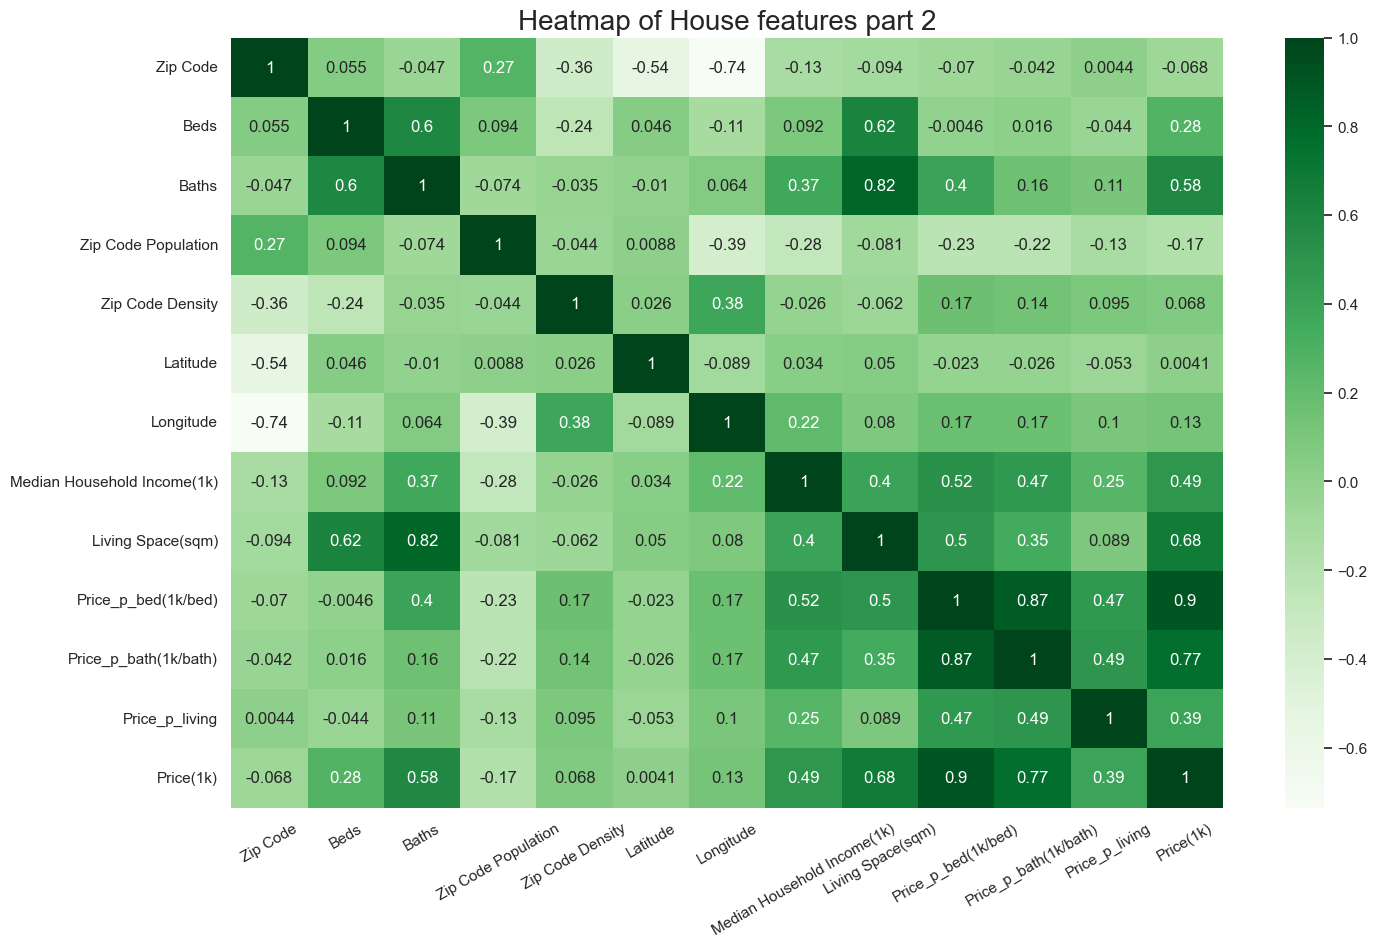

In [153]:
# create correlation maps
feature_corr2 = feature_data.corr()
plt.figure(figsize=(16,10))

# visualise correlation map using heatmp
sns.heatmap(data=feature_corr2, annot=True, cmap="Greens")
plt.title("Heatmap of House features", fontsize=20)

# modify heatmap
plt.title("Heatmap of House features part 2", fontsize=20)
plt.xticks(rotation=30)
plt.show()

By featuring engineering, new features have just appeared in the 2nd heatmap that show a stronger correlation in comparison with the 1st heatmap. 
These features that will be considered for further analysis, are: 
+ Price_p_living
+ Price_p_path
+ Price_p_bed
+ Living Space
+ Median Household Income
+ Baths 
+ Beds